In [1]:
import keras

Using TensorFlow backend.


# Classifying movie reviews: a binary classification example

data is taken from "IMDB dataset" .They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
len(train_data)

25000

In [5]:
train_labels.shape

(25000,)

In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

## Preparing the data


In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Our Model

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 398us/step - loss: 0.4882 - accuracy: 0.7986 - val_loss: 0.3650 - val_accuracy: 0.8730
Epoch 2/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.2892 - accuracy: 0.9030 - val_loss: 0.3254 - val_accuracy: 0.8699
Epoch 3/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.2166 - accuracy: 0.9271 - val_loss: 0.2816 - val_accuracy: 0.8864
Epoch 4/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.1716 - accuracy: 0.9443 - val_loss: 0.2742 - val_accuracy: 0.8915
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1351 - accuracy: 0.9571 - val_loss: 0.2901 - val_accuracy: 0.8818
Epoch 6/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.1119 - accuracy: 0.9646 - val_loss: 0.2976 - val_accuracy: 0.8870
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

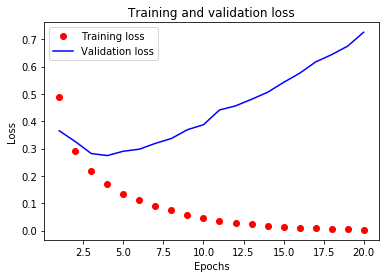

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

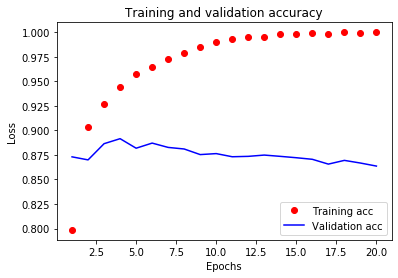

In [32]:
plt.clf()   # clear figure
acc_values = acc
val_acc_values = val_acc

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Resetting model

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.4622 - accuracy: 0.8180
Epoch 2/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.2642 - accuracy: 0.9063
Epoch 3/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2025 - accuracy: 0.9265
Epoch 4/4
25000/25000 [==============================] - 6s 256us/step


In [35]:
model.predict(x_test)

array([[0.22056934],
       [0.99997413],
       [0.90379703],
       ...,
       [0.13815695],
       [0.05805886],
       [0.6432081 ]], dtype=float32)

In [36]:
model.predict(x_test[:1])

array([[0.22056928]], dtype=float32)